<a href="https://colab.research.google.com/github/ckmeher/CNN-Model/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AlexNet
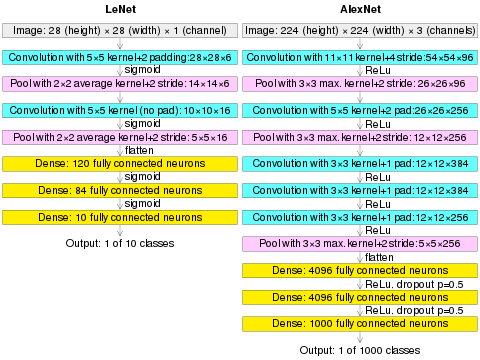

In [1]:
import torch
import torch.nn as nn

In [14]:
class AlexNet(nn.Module):
    def __init__(self,in_channels,num_classes):
        super(AlexNet,self).__init__()
        self.in_channels = in_channels
        self.num_classes = num_classes

        #conv_layers
        self.conv_layers=nn.Sequential(
            nn.Conv2d(in_channels=self.in_channels,out_channels = 96,kernel_size=(11,11),stride=(4,4),padding=(0,0)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3),stride=(2,2)),
            nn.Conv2d(in_channels=96,out_channels= 256,kernel_size=(5,5),stride=(2,2),padding=(0,0)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3),stride=(2,2)),
            nn.Conv2d(in_channels=256,out_channels= 384,kernel_size=(3,3),stride=(1,1),padding=(1,1)),
            nn.ReLU(),
            nn.Conv2d(in_channels=384,out_channels= 384,kernel_size=(3,3),stride=(1,1),padding=(1,1)),
            nn.ReLU(),
            nn.Conv2d(in_channels=384,out_channels= 256,kernel_size=(3,3),stride=(1,1),padding=(1,1)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3),stride=(2,2))
        )

        #dens layer
        self.linear_layers=nn.Sequential(
            nn.Linear(in_features=1024,out_features=4096), #where do you get this 1024
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.Linear(in_features=4096,out_features=4096),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.Linear(in_features=4096,out_features=1000),
        )

    def forward(self,x):
        x = self.conv_layers(x)
        # flatten to prepare for the fully connected layers
        x = x.reshape(x.size(0), -1)
        x = self.linear_layers(x)
        return x


In [15]:
def test_AlexNet():
     x =torch.randn(1,3,224,224)
     model = AlexNet(in_channels=3,num_classes=1000)
     return model(x)

if __name__ == "__main__":
    out = test_AlexNet()
    print(out.shape)

torch.Size([1, 1000])
